# Data Preprocessing

### Possible Use Cases of Dataset

1. **Automating Loan Approvals**
*  Instead of manual reviews, banks can use ML models to quickly assess loan applications.
* Reduces human bias and speeds up processing.

2. **Reducing Default Risk**
* Helps identify high-risk applicants by analyzing historical loan repayment data.
* Can reduce non-performing loans (NPLs) and financial losses.

3. **Improving Customer Experience**
* Faster decisions improve customer satisfaction.
* Pre-approved loan offers based on AI assessments.

4. **Fraud Detection**
* ML can flag suspicious applications (e.g., inconsistent income details).
* Prevents financial fraud.

### Dataset
Dataset: Loan Prediction dataset
* Numerical Features - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History
* Categorical Features - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Loan_Status

### Project Workflow
* Problem Understanding and Dataset Overview
* Data Exploration and Cleaning
* Exploratory Data Analysis (EDA)
* Statistical and Probabilistic Analysis
* Feature Engineering
* Machine Learning Model
* Interpretation and Reporting

### Expected Deliverables
* Cleaned Dataset – Preprocessed and structured dataset, free of inconsistencies and missing values.
* Statistical Analysis Report – Summary of hypothesis tests, probability calculations, and key statistical insights.
* Visualizations – Graphs and charts from Exploratory Data Analysis (EDA) and statistical testing to highlight patterns and relationships.
* Machine Learning Model – Trained model with performance evaluation metrics (e.g., accuracy, precision, recall, F1-score).
* Final Report & Presentation – Comprehensive summary of findings, insights, and recommendations, including key takeaways for decision-making.

### Importing Libraried and Dataset

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Load dataset
df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\Courses\Agility Africa\Loan Prediction Assignment\Loan Prediction data - Loan Prediction data.csv")
#creating a copy
df1 = df.copy()

# data overview
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [111]:
# about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
# data size
df1.shape

(614, 13)

In [113]:
# summary of data
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [114]:
# unique values in data
df1.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Data Cleaning

In [115]:
# Handling missing values
print("Missing values:")
print(df1.isnull().sum())

Missing values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


###### Missing Data
* There are 614 rows in our data and 13 columns
* The LoanID is irrelevant to our model building, so it was dropped. 
* Gender has 13 missing values
* Married column is missing 3 values
* Dependents has 15 missing values
* Self_Employed column is missing 32 values
* LoanAmount column is missing 22 values
* Loan_Amount_Term is missing 14 values
* Credit_History column is missing 50 values
* Other columns are complete

###### Data Types
* All data has appropraite data types


In [116]:
# Handling Missing Values

df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)  # Fill Gender with mode
df1["Married"].fillna(df1["Married"].mode()[0], inplace=True)  # Fill Married with mode
df1["Dependents"].fillna(df1["Dependents"].mode()[0], inplace=True)  # Fill Dependents with mode
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0], inplace=True)  # Fill Self_Employed with mode
df1["LoanAmount"].fillna(df1["LoanAmount"].median(), inplace=True)  # Fill LoanAmount with median
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].median(), inplace=True)  # Fill Loan_Amount_Term with median
df1["Credit_History"].fillna(df1["Credit_History"].median(), inplace=True)  # Fill Credit_History with median


# Overview After Treating Missing Values
df1.info(), df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64)

In [63]:
df1_cleaned = df1.copy()

#### Treating Missing Data
* Minor portions of our data were incomplete, so they were filled
* For the categorical data, mode was used to fill the empty cells
* For the numerical data, median was used to fill the empty cells
* No column was dropped because they are vital to achieving any of the use cases mentioned 

In [64]:
# Handling Duplicates
df_duplicate_count = df.duplicated().sum
df_duplicate_count()

0

### Outlier Detection and Treatment in Numerical Variable

* **Numerical Features** - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History
* **Categorical Features** - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Loan_Status

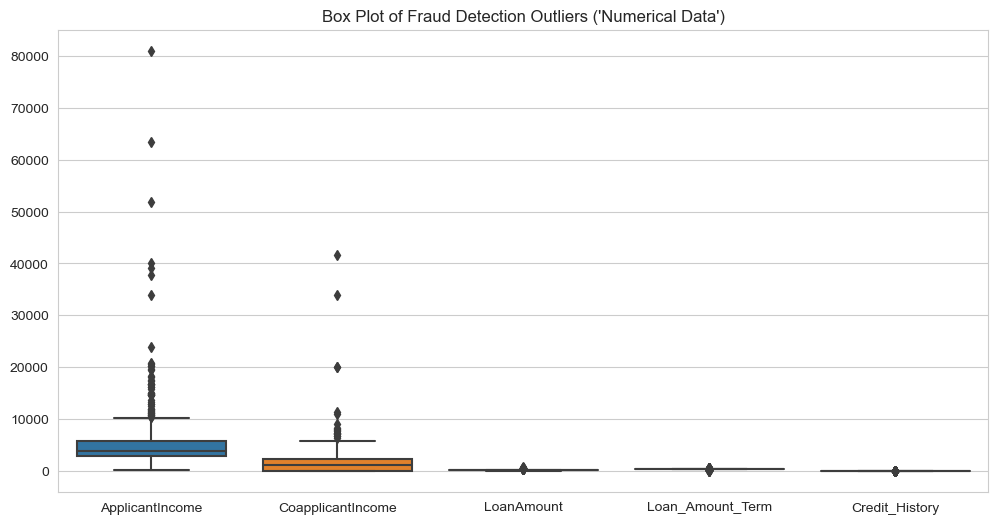

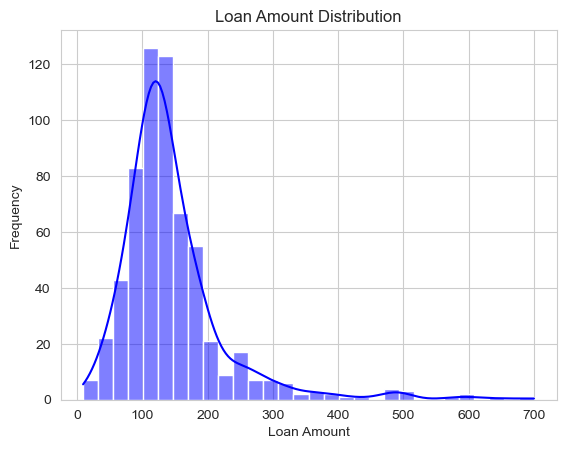

In [65]:
# Visualizing Data before Outliers Treatment
num_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
#Box Plot For Dataset
plt.figure(figsize=(12,6))
sns.boxplot(data=df1_cleaned[num_features])
plt.title("Box Plot of Fraud Detection Outliers ('Numerical Data')")
plt.show()

# LoanAmount Distribution
sns.histplot(df1_cleaned['LoanAmount'].dropna(), bins=30, kde=True, color='Blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()



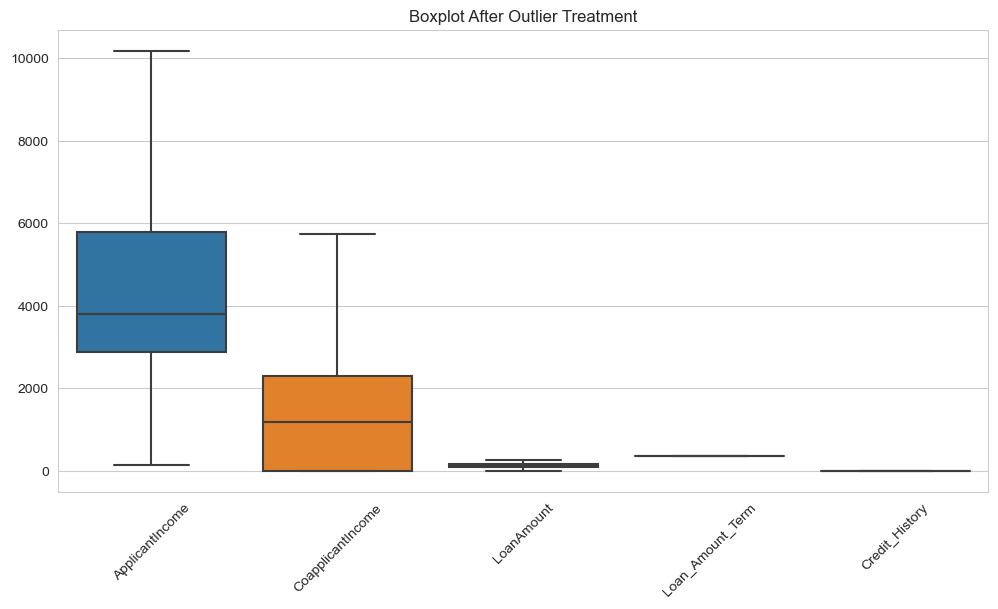

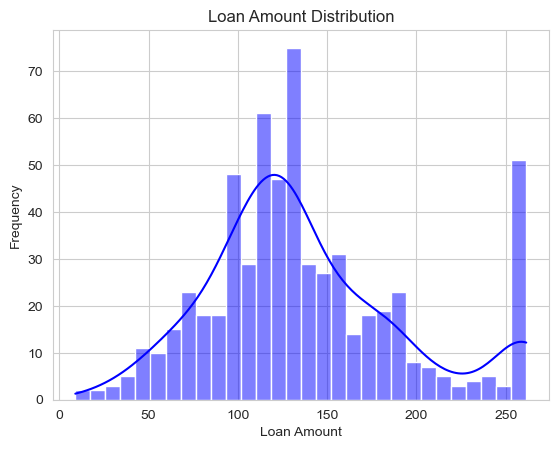

In [66]:
# Handling Outliers using IQR(Inter Quartile Range)

# Calculate IQR for each column
Q1 = df1_cleaned[num_features].quantile(0.25)
Q3 = df1_cleaned[num_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers
for col in num_features:
    df1_cleaned[col] = df1_cleaned[col].clip(lower_bound[col], upper_bound[col])

# Replot boxplot to confirm outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_cleaned[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()

# LoanAmount Distribution
sns.histplot(df1_cleaned['LoanAmount'].dropna(), bins=30, kde=True, color='Blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


####  Outlier Treated
* Outlier has been treated
* However, the distribution is still skewed to the right.
* We will check for skewness when performing statistical calculations

### Exploratory Data Analysys (EDA)

In [67]:
df1_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.0
mean,4617.111564,1419.702231,137.365635,360.0,1.0
std,2479.851729,1624.605892,55.779749,0.0,0.0
min,150.000000,0.000000,9.000000,360.0,1.0
25%,2877.500000,0.000000,100.250000,360.0,1.0
50%,3812.500000,1188.500000,128.000000,360.0,1.0
75%,5795.000000,2297.250000,164.750000,360.0,1.0
max,10171.250000,5743.125000,261.500000,360.0,1.0


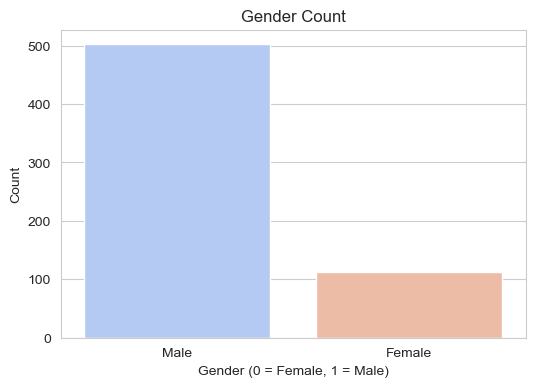

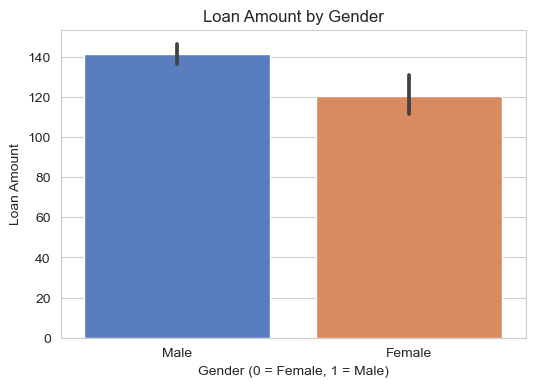

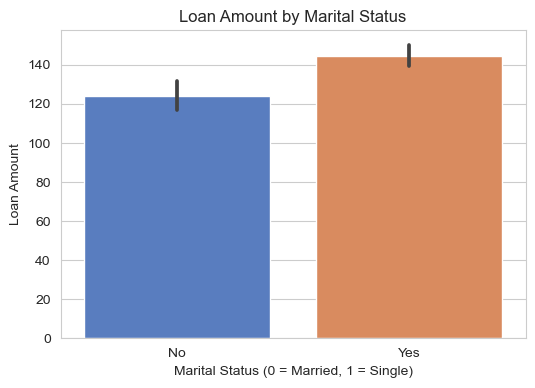

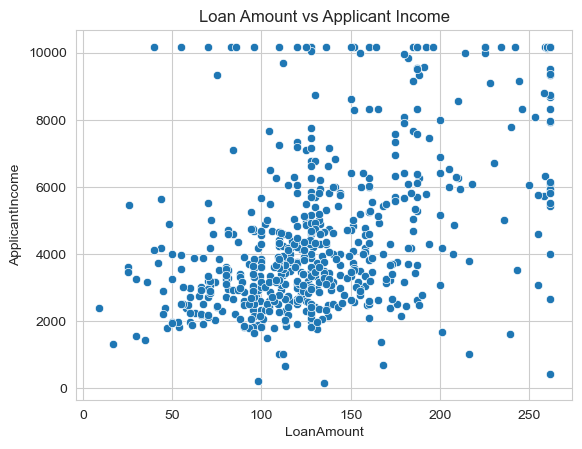

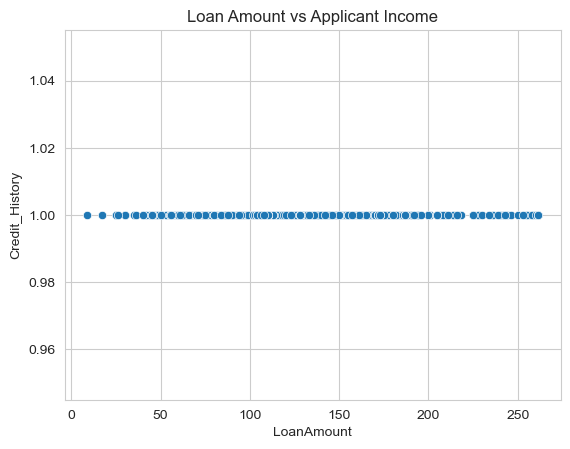

In [68]:
# Set visualization style
sns.set_style("whitegrid")

# Countplot for Gender column
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df1_cleaned, palette="coolwarm")
plt.title("Gender Count")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# Loan Amount By Gender
plt.figure(figsize=(6, 4))
sns.barplot(x="Gender", y="LoanAmount", data=df1_cleaned, palette="muted")
plt.title("Loan Amount by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Loan Amount")
plt.show()

# Loan Amount By Marital Status
plt.figure(figsize=(6, 4))
sns.barplot(x="Married", y="LoanAmount", data=df1_cleaned, palette="muted")
plt.title("Loan Amount by Marital Status")
plt.xlabel("Marital Status (0 = Married, 1 = Single)")
plt.ylabel("Loan Amount")
plt.show()


sns.scatterplot(x="LoanAmount",y="ApplicantIncome", data=df1_cleaned)
plt.title("Loan Amount vs Applicant Income")
plt.show()

sns.scatterplot(x="LoanAmount",y="Credit_History", data=df1_cleaned)
plt.title("Loan Amount vs Applicant Income")
plt.show()

### Statistical Analysis

In [69]:
# Mean Median Mode of Loan Amount
Mean_LoanAmount = df1_cleaned['LoanAmount'].mean()
Median_LoanAmount = df1_cleaned['LoanAmount'].median()
Mode_LoanAmount = df1_cleaned['LoanAmount'].mode()

print(f"Mean: {Mean_LoanAmount}, Median {Median_LoanAmount}, Mode: {Mode_LoanAmount}")

Mean: 137.3656351791531, Median 128.0, Mode: 0    261.5
Name: LoanAmount, dtype: float64


In [70]:
# Variance and Standard Deviation of Loan Amount
Var_LoanAmount = df1_cleaned['LoanAmount'].var()
Std_LoanAmount = df1_cleaned['LoanAmount'].std()

print(f"Variance: {Var_LoanAmount}, Standard Deviation: {Std_LoanAmount}")

Variance: 3111.3803668878986, Standard Deviation: 55.7797487166077


In [71]:
#Checking Skewness
from scipy.stats import skew
print("Skewness:", skew(df1_cleaned["LoanAmount"]))

Skewness: 0.6820212655066681


* The skewness value of 0.682 suggests a moderate right skewness, meaning some larger loan amounts are pulling the tail to the right
* Therefore, the mean is greater than the median
* The standard deviation is large(55.78), indicating the wide spread loan amounts. This confirms that some customers took much larger loan, contributing to the moderate skewness.

In [72]:
# correlation coefficients between 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
data1 = df1_cleaned[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
correlation_matrix = data1.corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.228956    0.557953
CoapplicantIncome        -0.228956           1.000000    0.265021
LoanAmount                0.557953           0.265021    1.000000


Key Observations:
1. ApplicantIncome vs LoanAmount (0.558 → Moderate Positive Correlation)
    * Higher applicant income is moderately associated with higher loan amounts.
    * This suggests that banks consider applicant income as an important factor in loan approval.

2. CoapplicantIncome vs LoanAmount (0.265 → Weak Positive Correlation)
    * Coapplicant income has a weaker influence on loan amount compared to applicant income.
    * This might mean that banks prioritize the primary applicant’s income more when deciding loan amounts.

3. ApplicantIncome vs CoapplicantIncome (-0.229 → Weak Negative Correlation)
    * This weak negative correlation suggests that when the applicant’s income is high, the coapplicant’s income tends to be lower, and vice versa.
    * It could mean that higher-earning applicants tend to apply alone, while lower-earning applicants often apply with a coapplicant to boost eligibility.

##### Hypothesis Testing
* Null Hypothesis: Loan approval rate is independent of applicant gender.
* Alternative Hypothesis: Loan approval rate is dependent on applicant gender

In [73]:
# Independent Two Sample T-test to test if loan approval rate is independent of applicant gender
male_approval = df1_cleaned[(df1_cleaned["Gender"]=='Male')&(df1_cleaned["Loan_Status"]=='Y')]["LoanAmount"]
female_approval = df1_cleaned[(df1_cleaned["Gender"]=='Female')&(df1_cleaned["Loan_Status"]=='Y')]["LoanAmount"]

t_stat, p_value = stats.ttest_ind(male_approval, female_approval, equal_var=False)
print(f"T-Statistics: {t_stat:2}")
print(f"P-Value:{p_value:2}")

T-Statistics: 3.2521652650478643
P-Value:0.0015095043883761922


* T-Statistic 3.25 indicates a noticeable difference between male and female loan approvals.
* Since P-value (0.0015) < 0.05, we reject the null hypothesis. This means that loan approval rates are significantly different based on gender—gender has an impact on loan approval amounts.

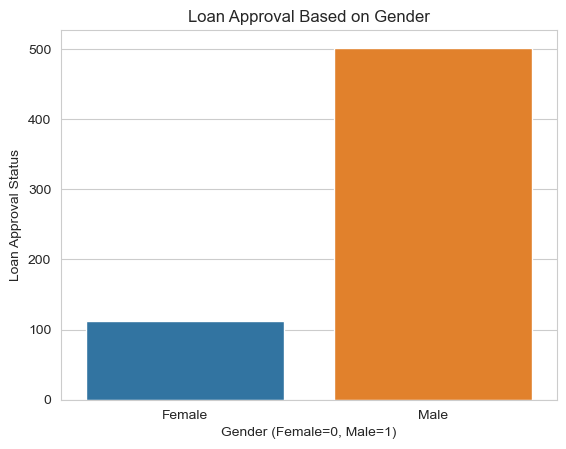

In [75]:
# Count loan approvals by gender
loan_approval_counts = df1_cleaned.groupby("Gender")["Loan_Status"].count().reset_index()

# Bar plot showing loan aKey Observation:
# The bar plot shows a significant difference between loan approval by genderpproval count based on gender
sns.barplot(x="Gender", y="Loan_Status", data=loan_approval_counts)
plt.xlabel("Gender (Female=0, Male=1)")
plt.ylabel("Loan Approval Status")
plt.title("Loan Approval Based on Gender")
plt.show()

Key Observation:
* The bar plot shows a significant difference between loan approval by gender

### Feature Engineering

In [77]:
# New Feature EMI is the Equated Monthly Installment
df1_cleaned["EMI"] = df1["LoanAmount"]/ df1_cleaned["Loan_Amount_Term"]
df1_cleaned["EMI"].head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

In [79]:
num_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","EMI"]
# Normalization of Numerical Features
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling 
scaler = MinMaxScaler()
df1_cleaned[num_features] = scaler.fit_transform(df1_cleaned[num_features])

# Display scaled data
df1_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI
0,LP001002,Male,No,0,Graduate,No,0.568692,0.000000,0.471287,0.0,0.0,Urban,Y,0.172214
1,LP001003,Male,Yes,1,Graduate,No,0.442360,0.262575,0.471287,0.0,0.0,Rural,N,0.172214
2,LP001005,Male,Yes,0,Graduate,Yes,0.284396,0.000000,0.225743,0.0,0.0,Urban,Y,0.082489
3,LP001006,Male,Yes,0,Not Graduate,No,0.242784,0.410578,0.439604,0.0,0.0,Urban,Y,0.160637
4,LP001008,Male,No,0,Graduate,No,0.583760,0.000000,0.522772,0.0,0.0,Urban,Y,0.191027


In [80]:
# Label Encoding of Categorical Data
from sklearn.preprocessing import LabelEncoder

# List of categorical features
cat_features = ["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

# Apply Label Encoding
encoder = LabelEncoder()
for col in cat_features:
    df1_cleaned[col] = encoder.fit_transform(df1_cleaned[col])

# Display transformed data
df1_cleaned.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI
0,0,1,0,0,0,0,0.568692,0.000000,0.471287,0.0,0.0,2,1,0.172214
1,1,1,1,1,0,0,0.442360,0.262575,0.471287,0.0,0.0,0,0,0.172214
2,2,1,1,0,0,1,0.284396,0.000000,0.225743,0.0,0.0,2,1,0.082489
3,3,1,1,0,1,0,0.242784,0.410578,0.439604,0.0,0.0,2,1,0.160637
4,4,1,0,0,0,0,0.583760,0.000000,0.522772,0.0,0.0,2,1,0.191027


In [95]:
# Splitting data
X = df1_cleaned.drop('Loan_Status', axis=1)
y = df1_cleaned['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Model

In [96]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [97]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [98]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 43]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



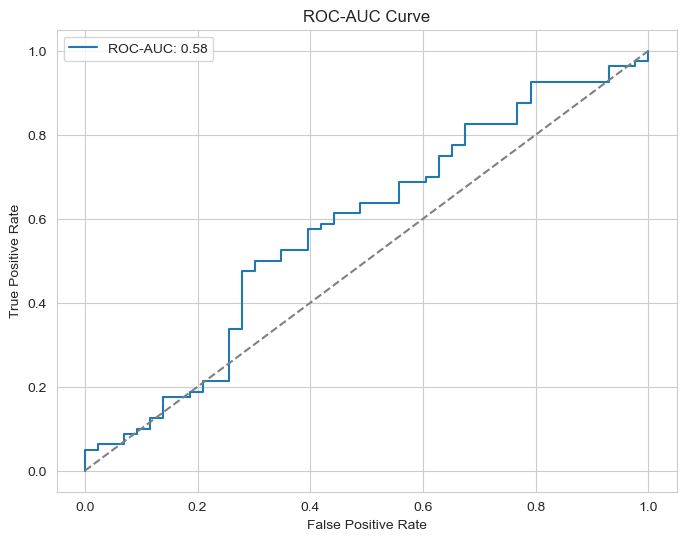

In [99]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [100]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

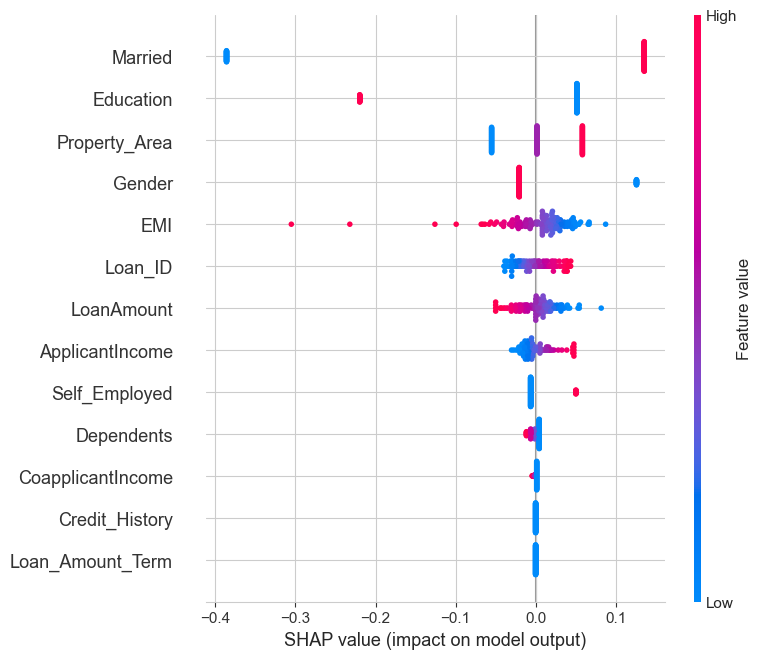

In [101]:
# Summary Plot
shap.summary_plot(shap_values, X_test)